In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from scipy import interp
from itertools import cycle
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
irisDataset = load_iris()
testSize = [0.09,0.1,0.5,0.75,0.8,0.95]
classifiers = [("Logistic Regression",LogisticRegression(multi_class='multinomial', 
                                                solver='newton-cg')),
               ("Linear Discriminant Analysis",LinearDiscriminantAnalysis()),
               ("Random Forest",RandomForestClassifier(random_state=42)),
               ("SGD",SGDClassifier(alpha=0.0001,penalty='l1')),
               ("Perceptron",Perceptron(random_state=42,penalty='l1'))

              ]

Accuracy_Dictionary = {}

In [3]:
X = irisDataset.data
y = irisDataset.target
features = irisDataset.feature_names
classes = irisDataset.target_names

In [4]:
#Normalize data.
scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)

In [5]:

def compute_metrics(classifier, predictions, Y_test):
   
    print("Metrics for ",classifier)
    print("Test Accuracy : ", metrics.accuracy_score(Y_test, predictions))
    
    y_actu = pd.Series(np.reshape(Y_test,len(Y_test)), name='Actual')
    y_pred = pd.Series(np.reshape(predictions, len(predictions)), name='Predicted')
    
    y_act = pd.Categorical(y_actu, categories=[0,1,2])
    y_pre = pd.Categorical(y_pred, categories=[0,1,2])
    
    #F1 score
    print("Average F1 score is {}".format(f1_score(Y_test, predictions, average='weighted', labels = [0,1,2])))
    
    df_confusion = pd.crosstab(y_act, y_pre, rownames =['Actual'],colnames=['Predicted'])
    print("Confusion matrix: \n", df_confusion)
    
    #Need to one hot encode for computing ROC
    n_classes = 3
    onh = OneHotEncoder()
    Y_test = Y_test.reshape((len(Y_test),1))
    predictions = predictions.reshape((len(predictions),1))
    Y_test = onh.fit_transform(Y_test).toarray()
    predictions = onh.fit_transform(predictions).toarray()
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    lw = 2
    # Compute macro-average ROC curve and ROC area
    #First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()


Metrics for  Logistic Regression
Test Accuracy :  0.933333333333
Average F1 score is 0.9328671328671329
Confusion matrix: 
 Predicted  0  1  2
Actual            
0          6  0  0
1          1  5  0
2          0  0  3


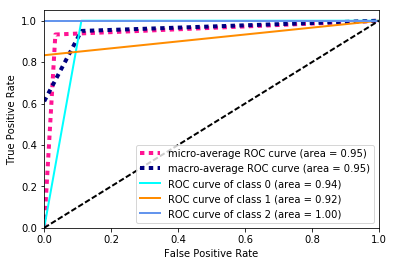



Metrics for  Linear Discriminant Analysis
Test Accuracy :  0.933333333333
Average F1 score is 0.9328671328671329
Confusion matrix: 
 Predicted  0  1  2
Actual            
0          6  0  0
1          1  5  0
2          0  0  3


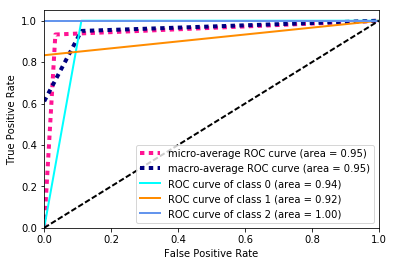



Metrics for  Random Forest
Test Accuracy :  0.933333333333
Average F1 score is 0.9328671328671329
Confusion matrix: 
 Predicted  0  1  2
Actual            
0          6  0  0
1          1  5  0
2          0  0  3


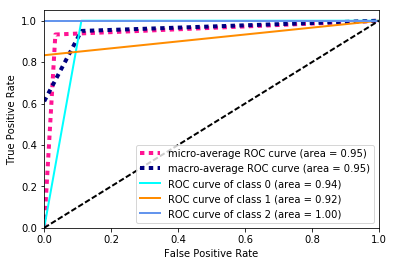



Metrics for  SGD
Test Accuracy :  0.933333333333
Average F1 score is 0.9328671328671329
Confusion matrix: 
 Predicted  0  1  2
Actual            
0          6  0  0
1          1  5  0
2          0  0  3


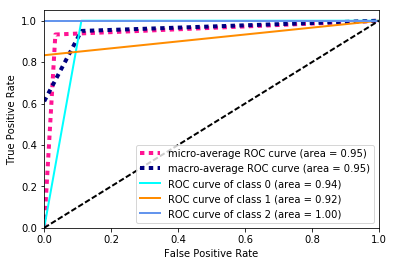



Metrics for  Perceptron
Test Accuracy :  0.933333333333
Average F1 score is 0.9328671328671329
Confusion matrix: 
 Predicted  0  1  2
Actual            
0          6  0  0
1          1  5  0
2          0  0  3


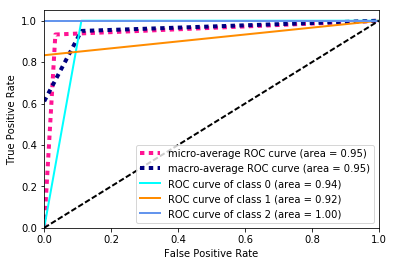

In [6]:
#Time for training

for name,classifier in classifiers:
    accuracies=[]
    for size in testSize:
        X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size = size,
                                                    random_state = 42)
        classifier.fit(X_train, Y_train)
        predictions = classifier.predict(X_test)
        accuracies.append(metrics.accuracy_score(Y_test, predictions))
    Accuracy_Dictionary[name] = accuracies
    
#Generate metrics for all classifiers with 70:30 ratio
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.1,
                                                    random_state = 42)

for name,classifer in classifiers:    
    classifier.fit(X_train, Y_train)
    predictions = classifier.predict(X_test)
    compute_metrics(name,predictions,Y_test)
    print("\n====================================\n")



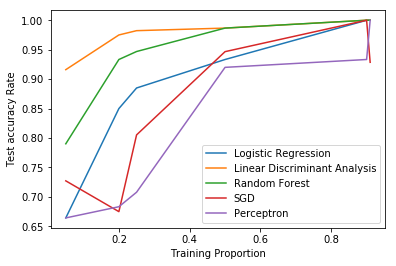

In [7]:
for name,classifier in classifiers:
    plt.plot(1. - np.array(testSize),Accuracy_Dictionary.get(name),label=name)
plt.legend(loc="lower right")
#plt.xlim(0,1)
plt.xlabel("Training Proportion")
plt.ylabel("Test accuracy Rate")
plt.show()